In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Dropout, MaxPool1D, ReLU, Flatten

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
samples_per_class = 5000
no_of_classes = 3
directory = "/content/gdrive/MyDrive/GW_SOP/Code/debugging/1D-CNN Multi-class/Signal_HIDDEN_in_strain_data/Signal_NOT_WHITENED/Test 5/data/"

In [ ]:
noise_df = pd.read_csv(directory + "Final_Merged_Noise_Reduced_No_Abs.csv", header=None)
noise = noise_df.values.astype(float)


data_BBH_df = pd.read_csv(directory + "Final_BBH_Merged_Noise_Signal.csv", header=None)
data_BBH = data_BBH_df.values.astype(float)


data_BNS_df = pd.read_csv(directory + "Final_BNS_Merged_Noise_Signal.csv", header=None)
data_BNS = data_BNS_df.values.astype(float)

In [ ]:
X = np.concatenate((noise, data_BBH, data_BNS), axis=0)
print(X.shape)

(15000, 16384)


In [ ]:
y = [int(i/samples_per_class) for i in range(samples_per_class*no_of_classes)]
y = tf.keras.utils.to_categorical(y)
print(y.shape)

(15000, 3)


In [ ]:
noise_df = None
data_BBH_df = None
data_BNS_df = None
noise = None
data_BBH = None
data_BNS = None

In [ ]:
X *= 1e19
print(X)

# X *= 1e18
# print(X)

# X *= 1e17
# print(X)

[[ 0.08654734 -0.04327294 -0.03265259 ...  0.00832924 -0.03529911
  -0.07598452]
 [ 0.03877031 -0.05713159  0.10085915 ...  0.10263685  0.17052503
   0.0023558 ]
 [ 0.04728862  0.13643112 -0.09263726 ... -0.11817854 -0.14404436
  -0.07499238]
 ...
 [-0.01368278  0.03321312 -0.01453072 ... -0.03260145  0.1401822
   0.02996138]
 [ 0.03975944 -0.05797626  0.01941073 ... -0.00382522  0.12784471
   0.03861407]
 [-0.17359331  0.02044404 -0.0930678  ...  0.00537131 -0.05985259
   0.01002358]]


In [ ]:
X = np.expand_dims(X, axis=-1)
print(X.shape)

(15000, 16384, 1)


In [ ]:
def create_model():    
    model = Sequential()

    model.add(Conv1D(16, 16, input_shape = (16384,1)))
    model.add(MaxPool1D(4, 4))
    model.add(ReLU())
    model.add(Conv1D(32, 8))
    model.add(MaxPool1D(4, 4))
    model.add(ReLU())
    model.add(Conv1D(64, 8))
    model.add(MaxPool1D(4, 4))
    model.add(ReLU())
    model.add(Conv1D(128, 8))
    model.add(MaxPool1D(4, 4))
    model.add(ReLU())
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation=tf.nn.softmax))

    model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
N_splits = 5
n_epochs = 5

kf = KFold(n_splits = N_splits, shuffle = True)
acc = [0 for i in range(n_epochs+1)]
loss = [0 for i in range(n_epochs)]
precision = 0
recall = 0
score = 0
cm = np.zeros((3,3))

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    # print(y_train)
    # print(y_test)

    model = create_model()
    history = model.fit(X_train, y_train, batch_size=128, epochs=n_epochs)

    print("---------------------------------------------------------------------------------------------------------")

    tmp_acc = history.history['accuracy']
    tmp_loss = history.history['loss']

    for i in range(n_epochs):
        acc[i+1] += tmp_acc[i]
        loss[i] += tmp_loss[i]

    pred = model.predict(X_test)
    y_pred = np.argmax(pred, axis = 1)
    y_true = np.argmax(y_test, axis = 1)

    cm = np.add(cm, confusion_matrix(y_true, y_pred, labels=[0, 1, 2]))

    model = None
    X_train, X_test = None, None
    y_train, y_test = None, None
    pred, y_pred, y_true = None, None, None    
    history = None

Epoch 1/10
79/79 [==============================] - 21s 141ms/step - loss: 1.1365 - accuracy: 0.3285
Epoch 2/10
79/79 [==============================] - 11s 138ms/step - loss: 1.0989 - accuracy: 0.3331
Epoch 3/10
79/79 [==============================] - 11s 137ms/step - loss: 1.0986 - accuracy: 0.3368
Epoch 4/10
79/79 [==============================] - 11s 138ms/step - loss: 1.0986 - accuracy: 0.3396
Epoch 5/10
79/79 [==============================] - 11s 138ms/step - loss: 1.0986 - accuracy: 0.3396
Epoch 6/10
79/79 [==============================] - 11s 138ms/step - loss: 1.0985 - accuracy: 0.3396
Epoch 7/10
79/79 [==============================] - 11s 138ms/step - loss: 1.0986 - accuracy: 0.3396
Epoch 8/10
79/79 [==============================] - 11s 139ms/step - loss: 1.0986 - accuracy: 0.3396
Epoch 9/10
79/79 [==============================] - 11s 138ms/step - loss: 1.0985 - accuracy: 0.3396
Epoch 10/10
79/79 [==============================] - 11s 138ms/step - loss: 1.0986 - accura

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy: 0.447
Precision: nan
Recall: 0.326
F1-Score: nan


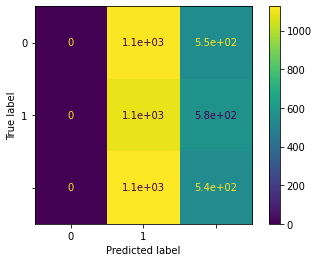

In [ ]:
final_accuracy = acc[n_epochs]/N_splits

precision = np.diag(cm) / np.sum(cm, axis = 0)
precision = sum(precision)/3

recall = np.diag(cm) / np.sum(cm, axis = 1)
recall = sum(recall)/3

score = (2*precision*recall)/(precision + recall)

final_cm = cm/N_splits



print('Accuracy: %.3f' % final_accuracy)
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print('F1-Score: %.3f' % score)

disp = ConfusionMatrixDisplay(confusion_matrix=final_cm, display_labels=[0, 1])
disp.plot()
plt.show()

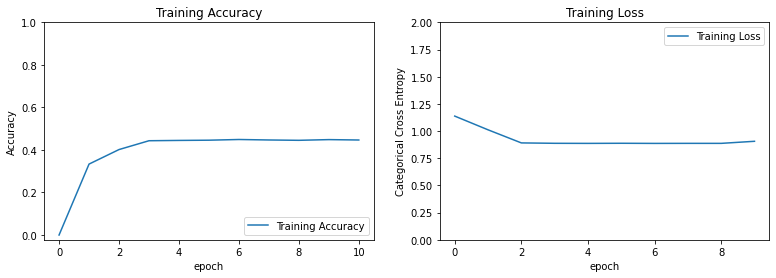

In [ ]:
acc_1 = [acc[i]/N_splits for i in range(n_epochs+1)]
loss_1 = [loss[i]/N_splits for i in range(n_epochs)]

plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plt.plot(acc_1, label='Training Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training Accuracy')
plt.xlabel('epoch')

plt.subplot(1, 2, 2)
plt.plot(loss_1, label='Training Loss')
plt.legend(loc='upper right')
plt.ylabel('Categorical Cross Entropy')
plt.ylim([0,2])
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()